Link to dataset in kaggle :  https://www.kaggle.com/blurredmachine/hackerearth-employee-attrition

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
sns.set( rc = {"figure.figsize":(12,8)} )
seed = 42

In [4]:
data = pd.read_csv( "Train.csv" )
print(data.shape)
data

(7000, 24)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
data.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

## Handling Missing Values

In [7]:
nan_cols =  data.isna().sum()[ data.isna().sum() > 0 ].index
nan_cols

Index(['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2',
       'VAR4'],
      dtype='object')

In [8]:
data[nan_cols].describe()

,Age,Time_of_service,Pay_Scale,Work_Life_balance,VAR2,VAR4
count,6588.000000,6856.000000,6991.000000,6989.000000,6423.000000,6344.000000
mean,39.622799,13.385064,6.006294,2.387895,-0.008126,1.891078
std,13.606920,10.364188,2.058435,1.122786,0.989850,0.529403
min,19.000000,0.000000,1.000000,1.000000,-1.817600,1.000000
25%,27.000000,5.000000,5.000000,1.000000,-0.961200,2.000000
50%,37.000000,10.000000,6.000000,2.000000,-0.104800,2.000000
75%,52.000000,21.000000,8.000000,3.000000,0.751600,2.000000
max,65.000000,43.000000,10.000000,5.000000,1.608100,3.000000


In [9]:
for nan_col in nan_cols:
    count = data[nan_col].value_counts().shape[0]
    
    if count <= 10:
        data[nan_col] = data[nan_col].fillna( data[nan_col].mode()[0] )
    else:
        data[nan_col] = data[nan_col].fillna( data[nan_col].median() )
        

In [10]:
data.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

## Column Reduction

In [11]:
to_drop = [ "Employee_ID" ]
data.drop( to_drop, inplace = True , axis=1 )

In [12]:
data

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [13]:
raw_data = data.copy()

## Hadling categorical variables

In [14]:
category_cols = data.dtypes[ data.dtypes == "object" ].index
category_cols

Index(['Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [15]:
categorical_unq = [ data[ category_col ].unique() for category_col in category_cols   ]
for unq in categorical_unq:
    print( unq )
    print()

['F' 'M']

['Married' 'Single']

['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']

['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']

['Conceptual' 'Analytical' 'Behavioral' 'Directive']

['type2' 'type3' 'type0' 'type4' 'type1']



In [16]:
for category_col in category_cols:
    unq_l = data[ category_col ].unique()
    if len(unq_l)==2:
        data[category_col] = np.where( data[category_col]==unq_l[0], 1 ,0 )
    else:
        dummy = pd.get_dummies( data[category_col], drop_first=True )
        data.drop( category_col, axis=1,inplace=True )
        data[ dummy.columns ] = dummy

In [17]:
data

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Franklin,Lebanon,Springfield,Washington,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Behavioral,Conceptual,Directive,type1,type2,type3,type4
0,1,42.0,4,1,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,24.0,3,0,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,58.0,3,1,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,1,26.0,3,0,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,31.0,1,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,23.0,5,1,4.0,1,20,1,2,6.0,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
6996,1,44.0,1,1,16.0,2,59,0,2,4.0,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6997,1,49.0,3,0,10.0,1,59,1,2,3.0,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6998,1,47.0,3,1,24.0,1,21,1,5,8.0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [18]:
raw_data

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


## Exploratory Data Analysis

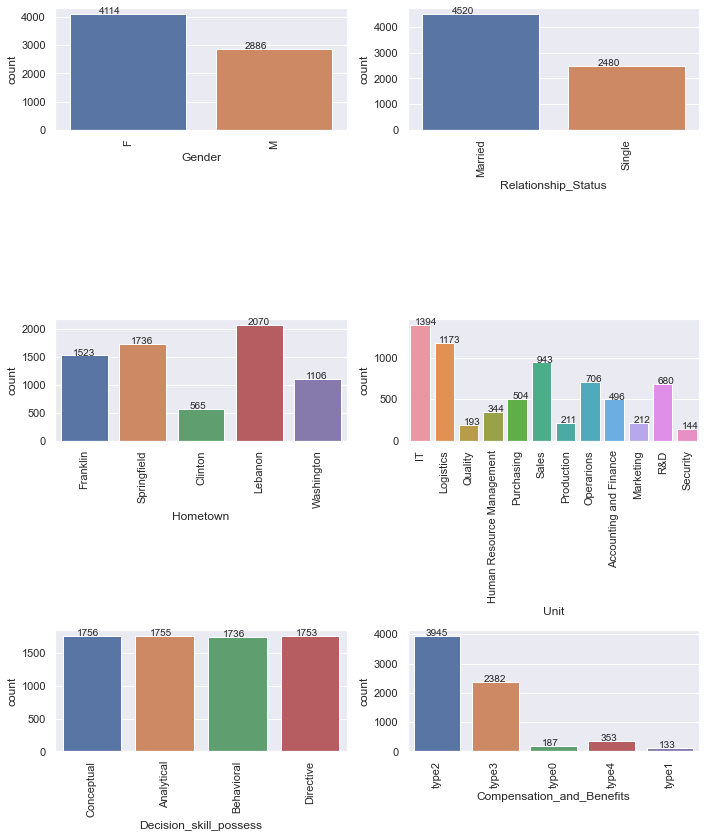

In [197]:
box_list = category_cols

ncols = 2
nrows= round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (10,15) )

for i in range(nrows):
    for j in range(ncols):
        
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        sns.countplot( x=raw_data[ box_list[ ncols*i + j ] ] , ax = ax[i,j] )
        ax[i,j].tick_params(axis='x', labelrotation = 90)
        
        x_labels = raw_data[ box_list[ ncols*i + j ] ].unique()
        val_counts = raw_data[ box_list[ ncols*i + j ] ].value_counts()
        
        for x_label_num in np.arange( len(x_labels) ):
            val = val_counts[x_labels[x_label_num]]
            ax[i,j].text( x_label_num-0.2 , val , val , fontsize=  10  )
        
        
        
        
        
fig.tight_layout()
plt.show()

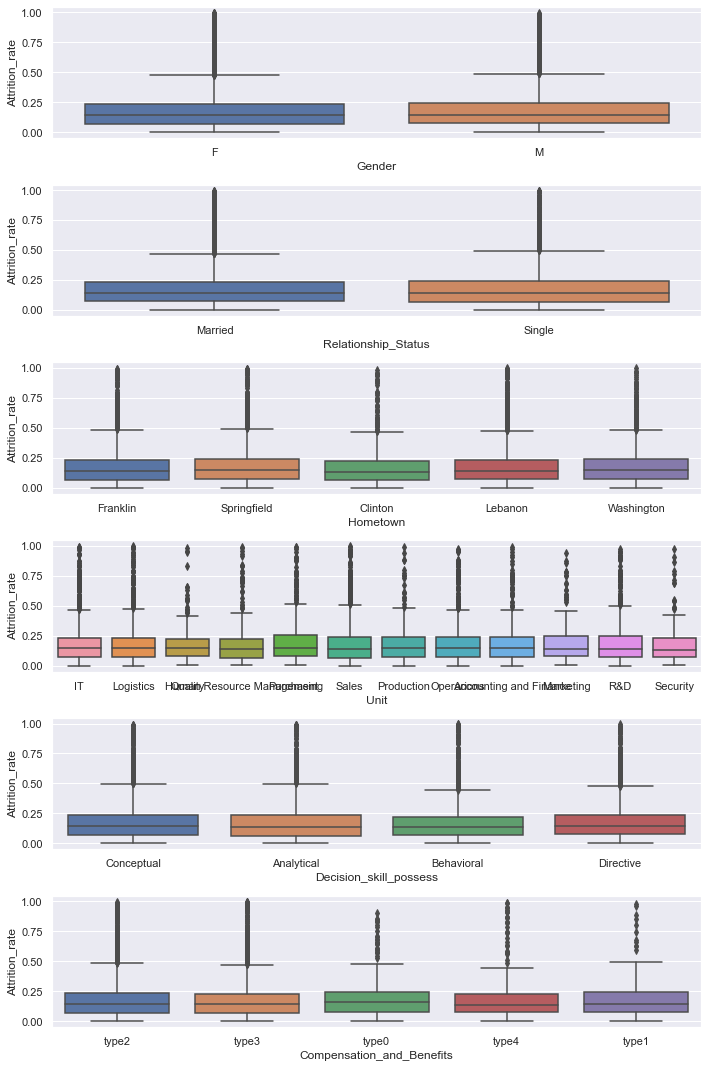

In [198]:
box_list = category_cols

fig,ax = plt.subplots( nrows = len(box_list) , figsize = (10,15) )



for i in range(len(box_list)):
    sns.boxplot( y = "Attrition_rate", x = box_list[i] , data = raw_data, ax = ax[i]  )
    ax[i].ticklabel_format( useOffset=False ,style='plain', axis = "y" )
    #ax[i].tick_params(axis='x', labelrotation = 90)
    #ax[i].set_ylim(0,600000)


fig.tight_layout()
plt.show()

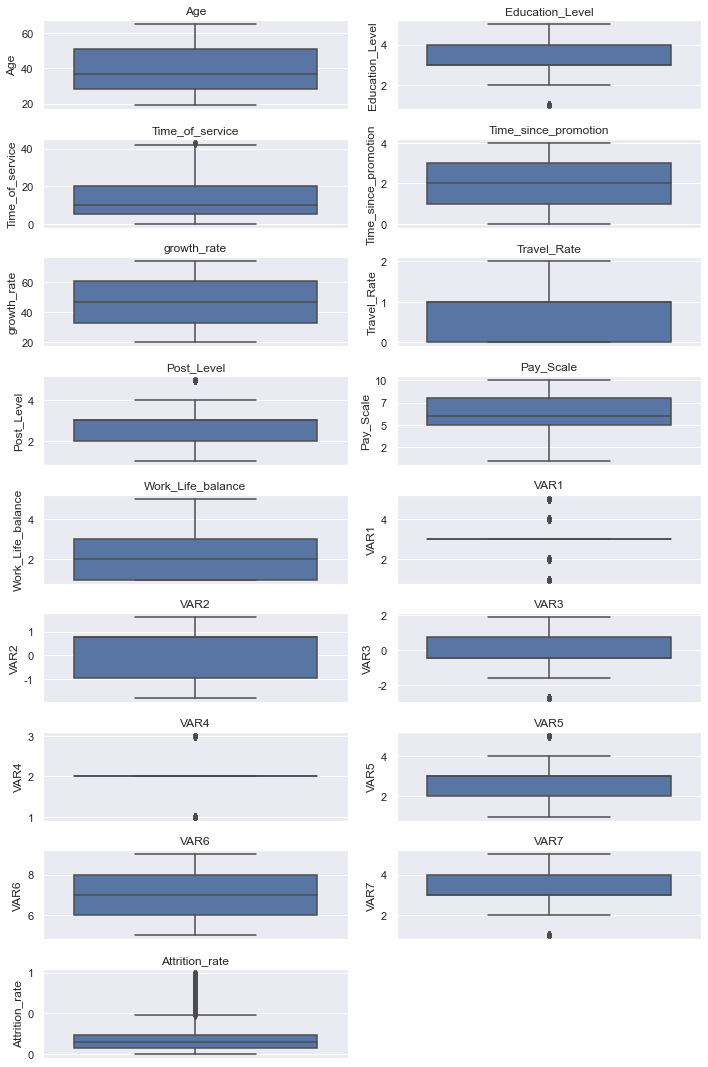

In [199]:
# boxplots

box_list = raw_data.drop( category_cols, axis=1 ).columns
ncols = 2
nrows=  round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (10,15) )


for i in range(nrows):
    for j in range(ncols):
        
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        
        sns.boxplot( y = box_list[ ncols*i + j ]  , data = raw_data , ax = ax[i,j] )
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "y" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        
        
        ax[i,j].get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
        )


fig.tight_layout()
plt.show()

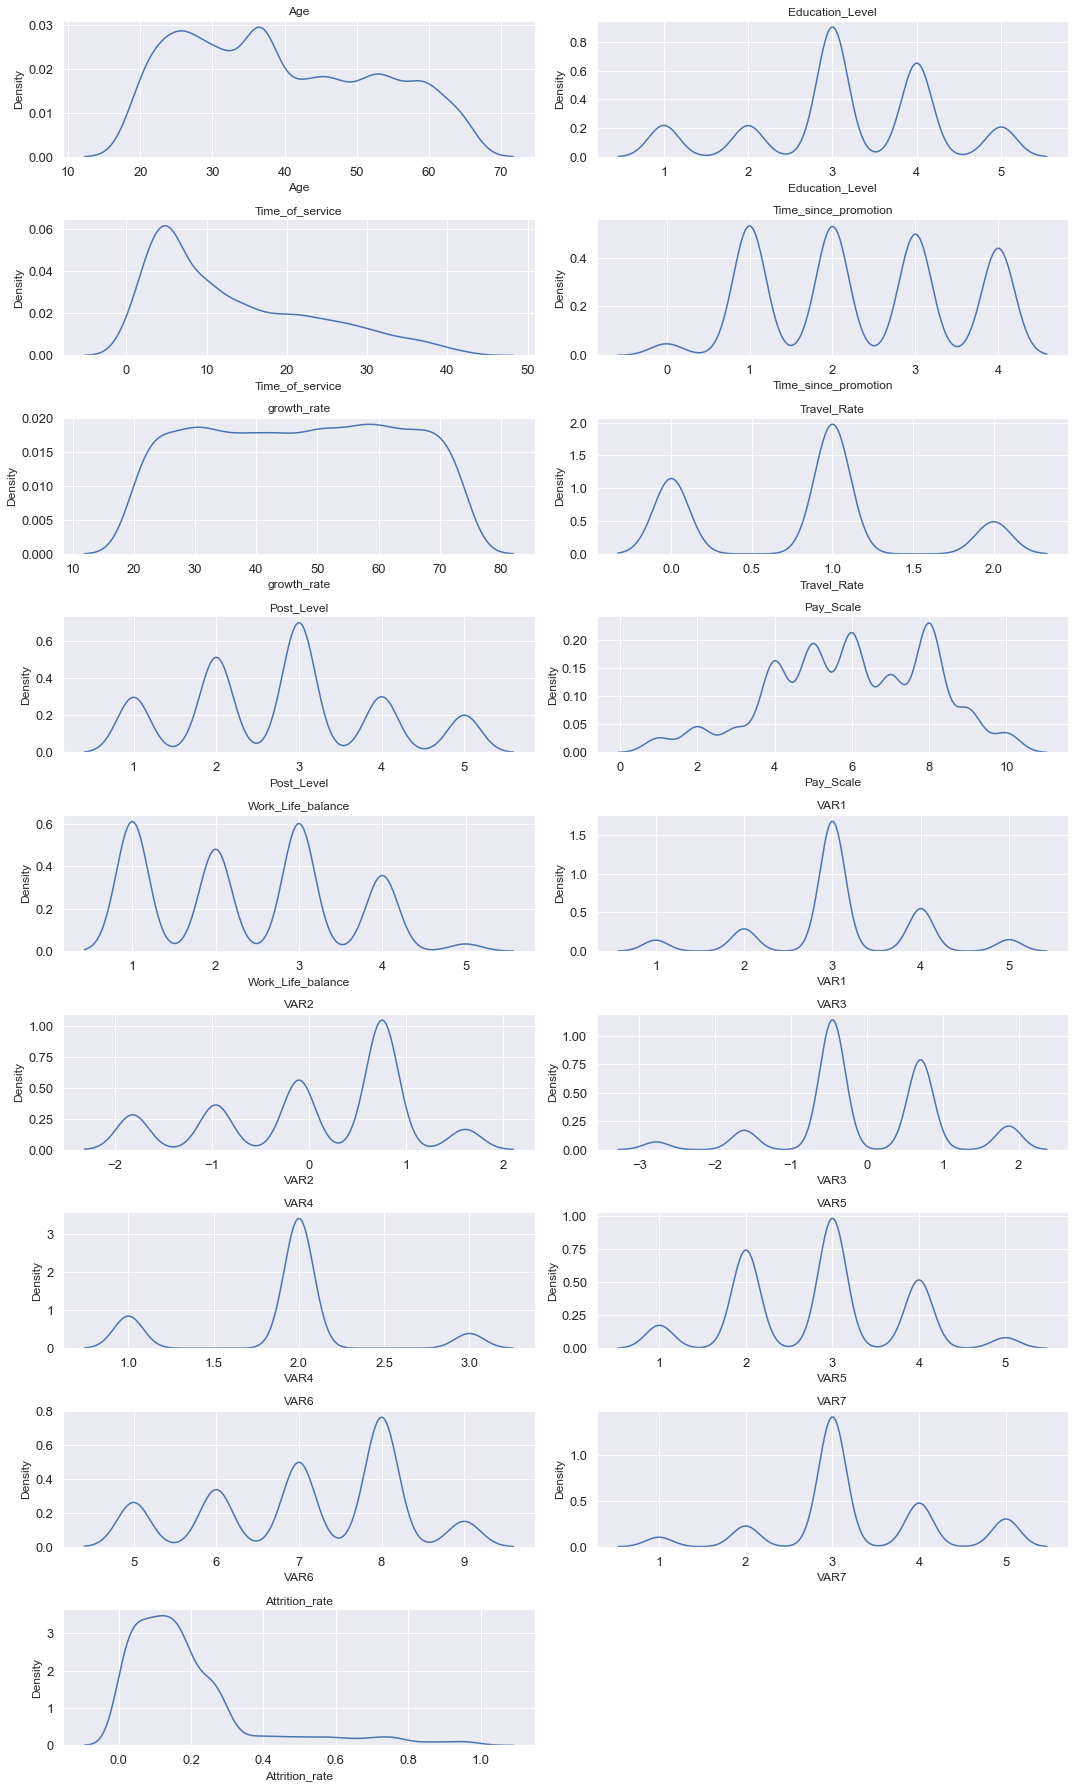

In [200]:
# histograms


box_list = raw_data.drop( category_cols, axis=1 ).columns

ncols = 2
nrows= round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (15,25) )


for i in range(nrows):
    for j in range(ncols):
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        sns.kdeplot( (raw_data[  box_list[ ncols*i + j ] ]) , ax = ax[i,j]  )
       
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "both" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        
        ax[i,j].tick_params( axis='both', which='major', labelsize= 13 )
        
        
        

fig.tight_layout()
plt.show()

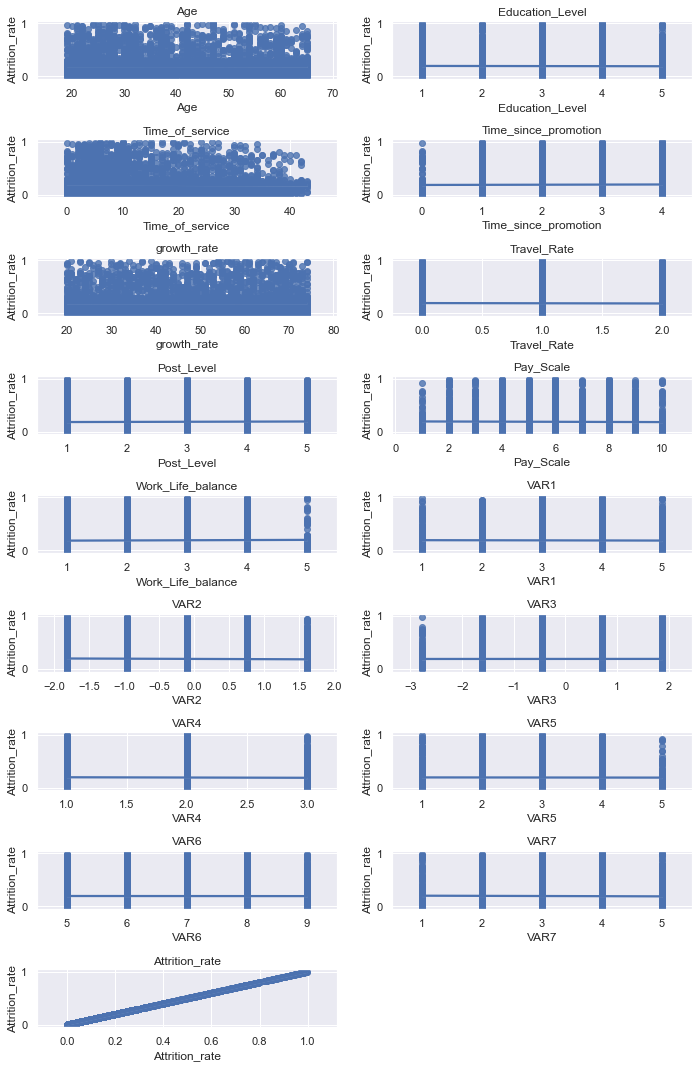

In [201]:
# scatterplot

box_list = raw_data.drop( category_cols, axis=1 ).columns

ncols = 2
nrows= round( (len(box_list) / ncols)+0.5 )

fig, ax = plt.subplots( nrows = nrows, ncols = ncols, figsize = (10,15) )


for i in range(nrows):
    for j in range(ncols):
        
        if ( (ncols*i + j) >= len(box_list) ):
            fig.delaxes( ax[ i, j] )
            continue
        
        d_min = raw_data[ box_list[ ncols*i + j ] ].min()
        d_max = raw_data[ box_list[ ncols*i + j ] ].max()
        d_rng = d_max - d_min
        
        sns.regplot( x= box_list[ ncols*i + j ]  , y = "Attrition_rate",data = raw_data , ax = ax[i,j] )         
        ax[i,j].ticklabel_format( useOffset=False ,style='plain', axis = "both" )
        ax[i,j].set_title( box_list[ ncols*i + j ] )
        ax[i,j].set_xlim(  d_min-( d_rng/8 )   , d_max+( d_rng/8 )   )  
        


fig.tight_layout()
plt.show()

<AxesSubplot:>

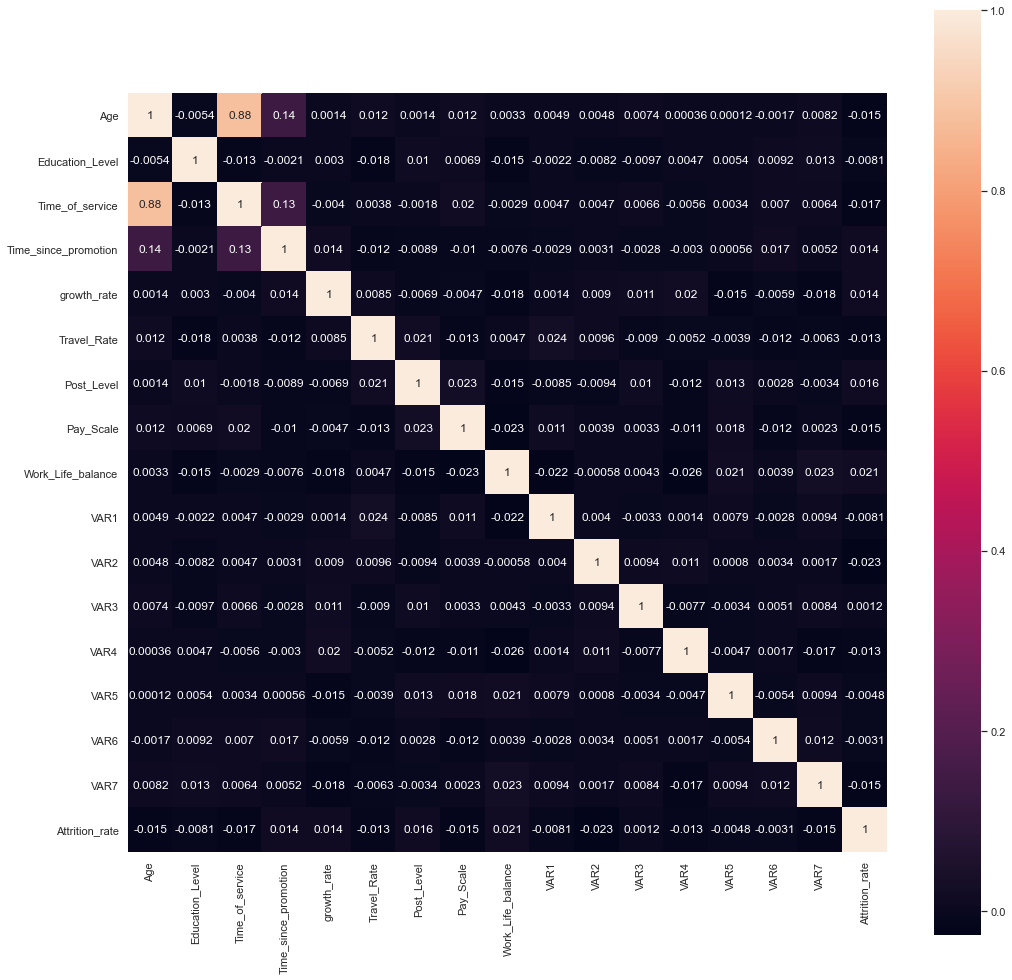

In [174]:
fig,ax = plt.subplots( figsize = (17,17) )
sns.heatmap(raw_data.corr(), square = True ,ax=ax, annot = True)

## Train Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV


from sklearn.metrics import r2_score,mean_squared_error

from sklearn.model_selection import train_test_split,cross_val_score


In [87]:
def score(actual,predicted):
    return 100 * max(0, 1- np.sqrt( mean_squared_error(actual, predicted)))

In [88]:
X = data.drop("Attrition_rate", axis=1)
y = data["Attrition_rate"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
X_train.shape,X_test.shape

((5250, 40), (1750, 40))

### Models which doesnt require scaling

#### Random Forest Regressor

In [90]:
rand_for = RandomForestRegressor(n_estimators= 100 , max_depth=20 , n_jobs=5)
rand_for.fit( X_train, y_train )
score( y_test, rand_for.predict(X_test)  )

80.75994419789778

#### XGBRegressor

In [92]:
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=12,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb_reg.fit( X_train,y_train )
score( y_test, xgb_reg.predict(X_test)  )

81.15075719876326

### Models which may require scaling

### Scaling

In [78]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
std = Normalizer()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [79]:
X_train

array([[1.        , 0.69565217, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.30434783, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.82608696, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.13043478, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.04347826, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ]])

### Simple Linear regression

In [116]:
l_reg = LinearRegression()
l_reg.fit( X_train,y_train )
score( y_test, l_reg.predict(X_test) )

81.13967879189848

### Lasso

In [117]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train )
score( y_test, lasso.predict(X_test) )

81.18580203307405

In [115]:
from sklearn.svm import SVR

svr = SVR(kernel="linear",degree = 7,C=0.01, )
svr.fit( X_train,y_train )
score( y_test, svr.predict(X_test) )

80.91592603701281

### KNeighborsRegressor

In [86]:
knn_r = KNeighborsRegressor(n_neighbors=9)
knn_r.fit( X_train,y_train )
score( y_test, knn_r.predict(X_test) )

80.30365273221652